# Data Science in Python 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 9]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

cmap = ListedColormap(('red', 'green'))
cmap_light = ListedColormap(('pink', 'lightgreen'))

In [24]:
def plot_classifier(X, classifier, X_test, y_test):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin) / 200, (ymax - ymin) / 200
    X1, X2 = np.meshgrid(np.arange(start = xmin - 0.1, stop = xmax + 0.1, step = dx),
                         np.arange(start = ymin - 0.1, stop = ymax + 0.1, step = dy))
    plt.contourf(X1, X2, classifier.predict(
            np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.9, cmap=cmap_light)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap, s=50, marker='.')
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

In [25]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


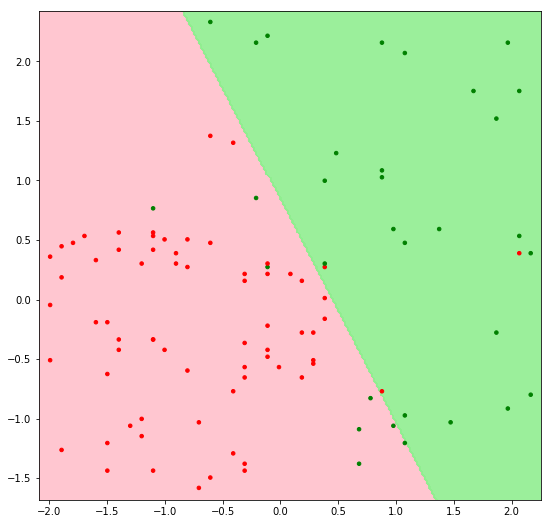

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plot_classifier(X_train, classifier, X_test, y_test)

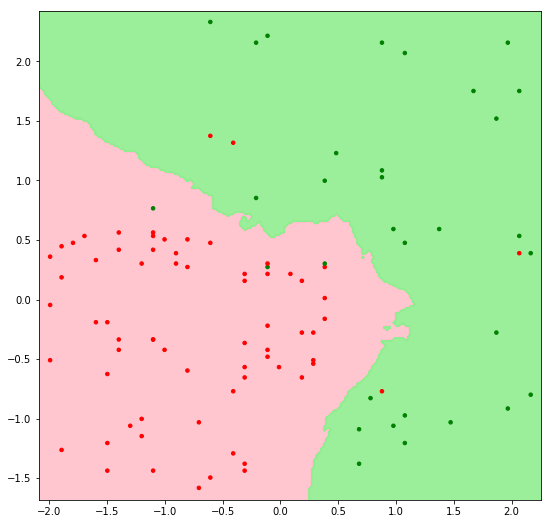

In [30]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plot_classifier(X_train, classifier, X_test, y_test)

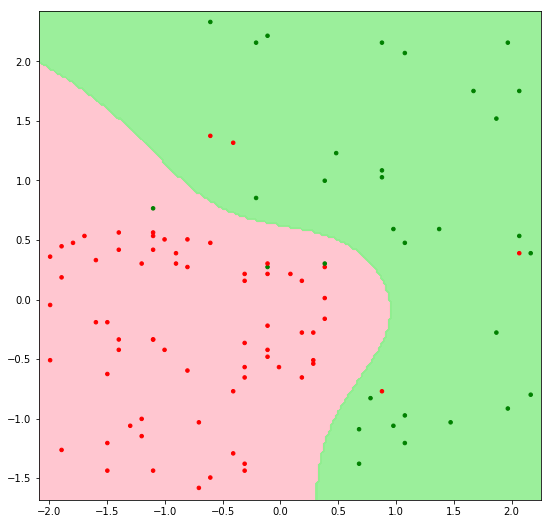

In [51]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma=0.5, C=10.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plot_classifier(X_train, classifier, X_test, y_test)

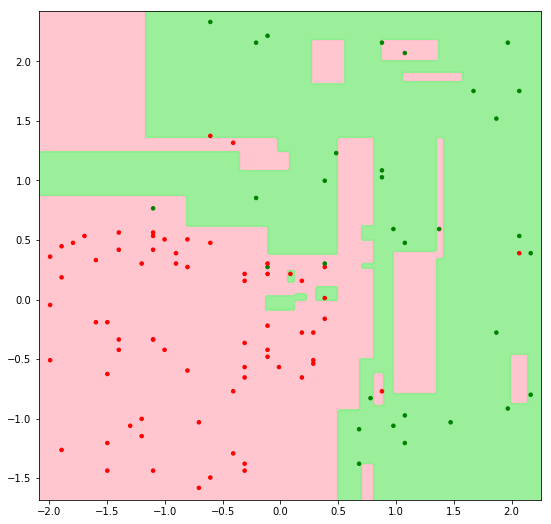

In [56]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(splitter='random')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plot_classifier(X_train, classifier, X_test, y_test)

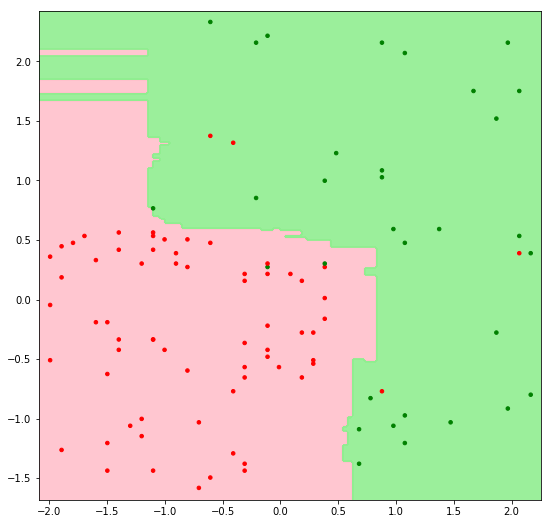

In [66]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plot_classifier(X_train, classifier, X_test, y_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Melhores parâmetros:

{'max_depth': 2, 'max_leaf_nodes': 10, 'n_estimators': 50}

Valores no grid:


0.903 (+/-0.090) for {'max_depth': 2, 'max_leaf_nodes': 10, 'n_estimators': 10}
0.907 (+/-0.099) for {'max_depth': 2, 'max_leaf_nodes': 10, 'n_estimators': 50}
0.907 (+/-0.099) for {'max_depth': 2, 'max_leaf_nodes': 10, 'n_estimators': 100}
0.890 (+/-0.118) for {'max_depth': 2, 'max_leaf_nodes': 20, 'n_estimators': 10}
0.900 (+/-0.120) for {'max_depth': 2, 'max_leaf_nodes': 20, 'n_estimators': 50}
0.903 (+/-0.101) for {'max_depth': 2, 'max_leaf_nodes': 20, 'n_estimators': 100}
0.897 (+/-0.122) for {'max_depth': 2, 'max_leaf_nodes': 30, 'n_estimators': 10}
0.900 (+/-0.104) for {'max_depth': 2, 'max_leaf_nodes': 30, 'n_estimators': 50}
0.903 (+/-0.101) for {'max_depth': 2, 'max_leaf_nodes': 30, 'n_estimators': 100}
0.877 (+/-0.092) for {'max_depth': 3, 'max_leaf_nodes': 10, 'n_estimators': 10}
0.903 (+/-0.110) for {'max_depth': 3, 'max_leaf_nodes': 10, 'n_estimators': 50}
0.900 (+/-0.105)

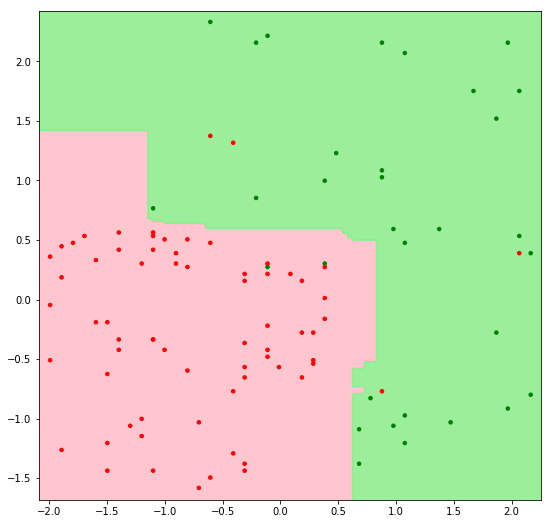

In [67]:
tuned_parameters = [{'max_depth': [2,3,4,5,6],
                     'max_leaf_nodes': [10, 20, 30],
                     'n_estimators': [10, 50, 100]}]

classifier = GridSearchCV(RandomForestClassifier(), tuned_parameters,
                            cv=5)
classifier.fit(X_train, y_train)

plot_classifier(X_train, classifier, X_test, y_test)

print("Melhores parâmetros:\n")
print(classifier.best_params_)
print("\nValores no grid:\n")
print()
means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Relatório detalhado:\n")
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

## Exemplo maior

### Banco de dados de câncer de mama de Wisconsin


https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [68]:
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [95]:
X = data.iloc[:, 2:32].values
y = data['diagnosis'].astype('category').cat.codes # Google

In [96]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Matriz de confusão

    |        |  Pred N | Pred S |
    | ------ | ------- | ------ |
    | Real N |    VN   |   FP   |
    | Real S |    FN   |   VP   |

- **Acurácia:** Quão frequentemente o classificador está certo? (VP+VN)/total
- **Razão de erro:** (FP+FN)/total = 1 - Acurácia.
- **Razão de VP/Sensibilidade/Recall:** Quando é S, quão freq. dá S? VP/Real S
- **Razão de FP:** Quando é N, quão freq. é S? FP/Real N
- **Razão de VN/Especificidade:** Quando é N, quão freq. é N? VN/Real N = 1 - Razão FP
- **Precisão:** Quando diz S, quão freq. está correto? VP/Pred S
- **Prevalência:** Quão freq. S ocorre? Real S/total

In [98]:
df = pd.DataFrame(np.random.rand(4,5),
                  columns=["Nome", "Acurácia", "Recall",
                           "Especificidade", "Precisão"])

tuned_parameters = [
    [{'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']},
     {'kernel': ['poly'], 'degree': [1,2,3,4,5,6], 'gamma': ['auto', 'scale']}],
    [{'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg'], 'max_iter': [1000]}],
    [{'max_depth': [2,3,4,5,6,7,8], 'splitter': ['best']}],
    [{'max_depth': [2,3,4,5,6,7,8], 'n_estimators': [10,100,200]}]
]

c = 0
for cl in [SVC, LogisticRegression,
           DecisionTreeClassifier, RandomForestClassifier]:
    classifier = GridSearchCV(cl(), tuned_parameters[c], cv=5,
                              scoring='accuracy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print("Melhores parâmetros:\n")
    print(classifier.best_params_)

    cm = confusion_matrix(y_test, y_pred)
    
    VN, FP, FN, VP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    total = VN + FP + FN + VP
    df.iloc[c] = [cl.__name__,
                  (VP + VN) / total,
                  VP / (FN + VP),
                  VN / (VN + FP),
                  VP / (FP + VP)]
    c = c + 1
    
df

Melhores parâmetros:

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Melhores parâmetros:

{'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}
Melhores parâmetros:

{'max_depth': 4, 'splitter': 'best'}
Melhores parâmetros:

{'max_depth': 7, 'n_estimators': 10}


,Nome,Acurácia,Recall,Especificidade,Precisão
0,SVC,0.982456,0.957447,1.000000,1.000000
1,LogisticRegression,0.964912,0.957447,0.970149,0.957447
2,DecisionTreeClassifier,0.956140,0.936170,0.970149,0.956522
3,RandomForestClassifier,0.947368,0.957447,0.940299,0.918367
